# Capstone Project: Predicting Solar Energy Output

## Introduction

This project aims to build a machine learning model that predicts daily solar energy output using historical energy consumption, weather patterns (e.g., sunlight, temperature), and geographic indicators. The insights from this project will help energy providers make data-driven decisions about production, distribution, and infrastructure planning.


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inline plotting for Jupyter notebooks
%matplotlib inline


## 2. Load Dataset

Loading the world energy consumption dataset and displaying the first few rows to understand the data structure and key variables.


In [2]:
# Load the dataset
df = pd.read_csv("World Energy Consumption.csv")

# Preview the first few rows
df.head()


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


## 3. Initial Data Inspection

Before any cleaning or modeling, we inspect the dataset to understand:
- Number of records and features
- Data types
- Most common missing columns
- Potential target and predictor variables


In [3]:
# Check the structure of the dataset
df.info()

# Check how many missing values exist in the top columns
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


biofuel_cons_change_pct               20265
solar_cons_change_pct                 19888
biofuel_cons_per_capita               19710
wind_cons_change_pct                  19599
nuclear_cons_change_pct               19545
biofuel_share_energy                  19341
biofuel_cons_change_twh               19325
biofuel_consumption                   19245
other_renewables_cons_change_pct      18463
nuclear_energy_per_capita             18232
nuclear_share_energy                  18176
electricity_share_energy              18113
solar_energy_per_capita               18002
solar_share_energy                    17977
wind_energy_per_capita                17947
wind_share_energy                     17911
fossil_energy_per_capita              17797
nuclear_cons_change_twh               17739
other_renewables_energy_per_capita    17719
other_renewables_share_energy         17704
dtype: int64

## 4. Data Cleaning

clean the dataset to prepare it for analysis.
- Dropping rows and columns with excessive missing values
- Removing duplicates
- Ensuring relevant columns have the correct data types
- Focusing on energy types that are relevant for modeling


In [ ]:

solar_cols = [
    'solar_consumption',
    'solar_share_energy',
    'solar_energy_per_capita',
    'solar_electricity'
]

#Drop columns with too many NaNs, but exclude solar columns and a few base columns
base_cols = ['year', 'country', 'population', 'gdp']
preserve_cols = base_cols + solar_cols
drop_candidates = [col for col in df.columns if col not in preserve_cols]
df_cleaned = df[preserve_cols + [col for col in drop_candidates if df[col].isnull().mean() < 0.5]]

#  Drop rows with missing values in core fields
df_cleaned = df_cleaned.dropna(subset=preserve_cols)

#  Drop duplicates and reset index
df_cleaned = df_cleaned.drop_duplicates().reset_index(drop=True)

# Output status
print("Remaining missing values:\n", df_cleaned.isnull().sum())
print("\nShape after cleaning:", df_cleaned.shape)

# Show sample
df_cleaned.head()


Remaining missing values:
 year                            0
country                         0
population                      0
gdp                             0
solar_consumption               0
solar_share_energy              0
solar_energy_per_capita         0
solar_electricity               0
iso_code                        9
coal_prod_change_twh          141
coal_prod_per_capita          129
coal_production               129
energy_cons_change_pct          8
energy_cons_change_twh          8
gas_prod_change_twh           109
gas_prod_per_capita           100
gas_production                100
oil_prod_change_twh           135
oil_prod_per_capita           124
oil_production                124
primary_energy_consumption      0
dtype: int64

Shape after cleaning: (2463, 21)


,year,country,population,gdp,solar_consumption,solar_share_energy,solar_energy_per_capita,solar_electricity,iso_code,coal_prod_change_twh,...,coal_production,energy_cons_change_pct,energy_cons_change_twh,gas_prod_change_twh,gas_prod_per_capita,gas_production,oil_prod_change_twh,oil_prod_per_capita,oil_production,primary_energy_consumption
0,1990,Algeria,25518074.0,1.178432e+11,0.0,0.0,0.0,0.0,DZA,-0.039,...,0.079,6.027,17.905,30.738,20243.287,516.570,45.016,26595.830,678.674,314.974
1,1991,Algeria,26133906.0,1.211052e+11,0.0,0.0,0.0,0.0,DZA,0.039,...,0.118,-0.914,-2.879,40.461,21314.477,557.031,3.934,26119.635,682.608,312.095
2,1992,Algeria,26748302.0,1.279827e+11,0.0,0.0,0.0,0.0,DZA,0.000,...,0.118,2.606,8.132,22.981,21684.043,580.011,-25.497,24566.473,657.111,320.227
3,1993,Algeria,27354326.0,1.302758e+11,0.0,0.0,0.0,0.0,DZA,0.039,...,0.158,-6.943,-22.232,7.455,21476.168,587.466,-2.073,23946.447,655.039,297.995
4,1994,Algeria,27937006.0,1.342799e+11,0.0,0.0,0.0,0.0,DZA,0.000,...,0.158,1.318,3.926,-47.357,19333.096,540.109,-2.930,23342.111,652.109,301.921


## 5. Feature Engineering

create new variables that can improve model performance and help better capture trends. Specifically:
- Derive energy per capita if not already available
- Create rolling averages for energy production (optional)
- Extract date-based features (e.g., decade)
- Normalize or scale variables (for later modeling)


In [7]:
# Create a feature: solar energy per 1M population
df_cleaned['solar_per_million'] = df_cleaned['solar_consumption'] / (df_cleaned['population'] / 1_000_000)

# Create a GDP per capita column
df_cleaned['gdp_per_capita'] = df_cleaned['gdp'] / df_cleaned['population']

# Create a decade column for potential grouping
df_cleaned['decade'] = (df_cleaned['year'] // 10) * 10

# Check new columns
df_cleaned[['year', 'solar_consumption', 'solar_per_million', 'gdp_per_capita', 'decade']].head()


,year,solar_consumption,solar_per_million,gdp_per_capita,decade
0,1990,0.0,0.0,4618.028052,1990
1,1991,0.0,0.0,4634.024246,1990
2,1992,0.0,0.0,4784.702742,1990
3,1993,0.0,0.0,4762.528683,1990
4,1994,0.0,0.0,4806.523380,1990


## 6. Exploratory Data Analysis (EDA)

explore trends, distributions, and relationships between features using visualizations:
- Correlated variables
- Outliers
- Growth patterns over time
- Predictive signals for modeling


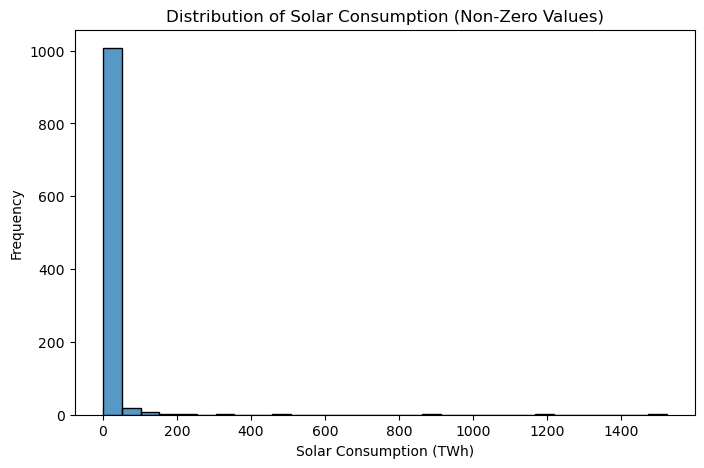

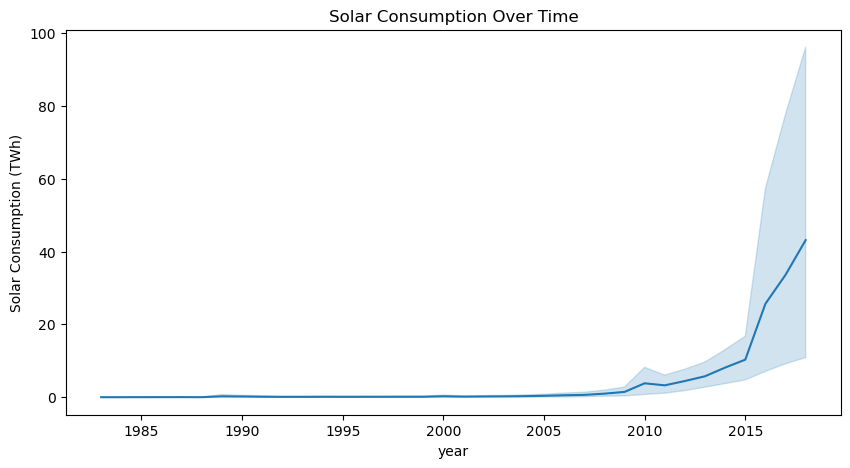

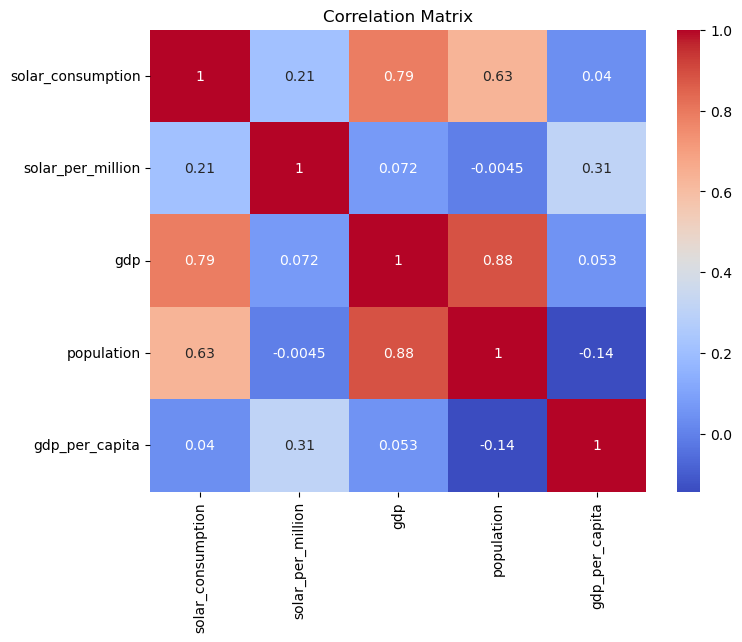

In [ ]:
# 1. Distribution of solar consumption (non-zero values only)
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned[df_cleaned['solar_consumption'] > 0]['solar_consumption'], bins=30)
plt.title('Distribution of Solar Consumption (Non-Zero Values)')
plt.xlabel('Solar Consumption (TWh)')
plt.ylabel('Frequency')

plt.show()

# 2. Solar consumption over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned[df_cleaned['solar_consumption'] > 0], x='year', y='solar_consumption')
plt.title('Solar Consumption Over Time')
plt.ylabel('Solar Consumption (TWh)')
plt.show()

# 3. Correlation heatmap (select relevant features)
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['solar_consumption', 'solar_per_million', 'gdp', 'population', 'gdp_per_capita']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 7. Preparing the Data for Modeling

prep dataset for regression modeling:
- Selecting numeric features with predictive value
- Filtering non-zero rows for solar consumption
- Splitting data into training and testing sets


In [9]:
# Filter rows where solar consumption is greater than zero
df_model = df_cleaned[df_cleaned['solar_consumption'] > 0].copy()

# Define predictors and target
X = df_model[['gdp', 'population', 'gdp_per_capita']]
y = df_model['solar_consumption']

# Split into training and testing data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dimensions
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (834, 3)
Testing set shape: (209, 3)


In [10]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 39.41
R² Score: -1.27


## 9. Results and Interpretation

The baseline Linear Regression model produced the following results:
- RMSE: 39.41
- R² Score: -1.27


